# Data Exploration and Cleaning:


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [28]:
# Load user_interactions.csv
user_interactions = pd.read_csv('user_interactions.csv')

# Explore user_interactions.csv
print(user_interactions.head())   # Display the first few rows

     User_ID    Page_Viewed  Time_Spent_Seconds
0  User_3198       Homepage                 560
1   User_126  Category Page                 168
2  User_1376  Category Page                 122
3  User_1117      Cart Page                 329
4  User_3683  Category Page                 391


In [29]:
print(user_interactions.info())  # Get information about the dataset, including missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   User_ID             5000 non-null   object
 1   Page_Viewed         5000 non-null   object
 2   Time_Spent_Seconds  5000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 117.3+ KB
None


In [30]:
# Check for missing values in user_interactions.csv
print(user_interactions.isnull().sum())

User_ID               0
Page_Viewed           0
Time_Spent_Seconds    0
dtype: int64


In [39]:
# Check for missing values in user_interactions.csv
print(user_interactions.isnull().sum())

User_ID               0
Page_Viewed           0
Time_Spent_Seconds    0
dtype: int64


In [40]:
# Load purchase_data.csv
purchase_data = pd.read_csv('purchase_data.csv')

# Explore purchase_data.csv
print(purchase_data.head())   # Display the first few rows

    Purchase_ID    User_ID  Product_ID  Transaction_Amount  \
0  Purchase_948  User_3840  Product_19           62.843031   
1  Purchase_905  User_1846   Product_9           21.780079   
2  Purchase_704  User_1700   Product_8          138.264455   
3  Purchase_766  User_4117  Product_15           74.991367   
4   Purchase_36  User_3053   Product_7          162.569998   

         Purchase_Time  
0  2023-04-02 16:35:46  
1  2023-04-14 16:38:27  
2  2023-01-21 11:21:31  
3  2023-01-29 04:44:04  
4  2023-05-24 03:30:23  


In [41]:
print(purchase_data.info())   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Purchase_ID         1000 non-null   object 
 1   User_ID             1000 non-null   object 
 2   Product_ID          1000 non-null   object 
 3   Transaction_Amount  1000 non-null   float64
 4   Purchase_Time       1000 non-null   object 
dtypes: float64(1), object(4)
memory usage: 39.2+ KB
None


In [34]:
# Check for missing values in purchase_data.csv
print(purchase_data.isnull().sum())

Purchase_ID           0
User_ID               0
Product_ID            0
Transaction_Amount    0
Purchase_Time         0
dtype: int64


In [42]:
# Load website_performance.csv
website_performance = pd.read_csv('website_performance.csv')

# Explore website_performance.csv
print(website_performance.head())   
print(website_performance.info())   

        Month  Page_Load_Time  Bounce_Rate  Conversion_Rate
0  2023-01-01        5.106652     0.514345         0.047375
1  2023-02-01        7.828199     0.317157         0.062764
2  2023-03-01        3.239983     0.480903         0.050514
3  2023-04-01        5.954509     0.473572         0.057151
4  2023-05-01        9.872398     0.542407         0.089525
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Month            12 non-null     object 
 1   Page_Load_Time   12 non-null     float64
 2   Bounce_Rate      12 non-null     float64
 3   Conversion_Rate  12 non-null     float64
dtypes: float64(3), object(1)
memory usage: 512.0+ bytes
None


In [45]:
print(website_performance.isnull().sum()) #for checking null values

Month              0
Page_Load_Time     0
Bounce_Rate        0
Conversion_Rate    0
dtype: int64


<AxesSubplot: >

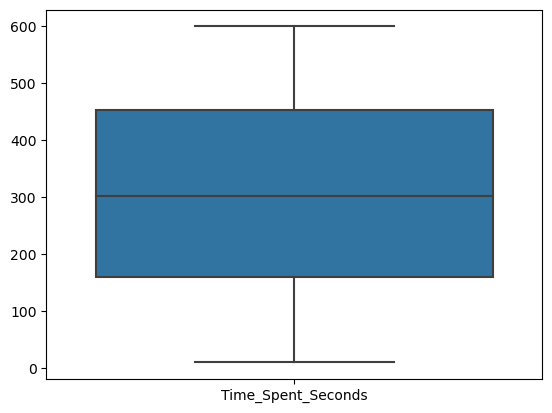

In [49]:
# Perform data cleaning and preprocessing if neede
sns.boxplot(user_interactions) # finding ouliers in user_interactions.csv

<AxesSubplot: >

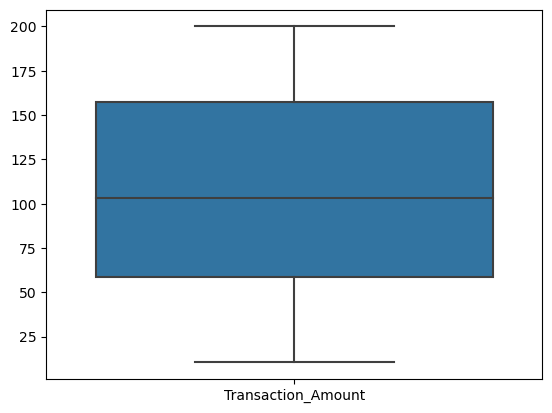

In [50]:
sns.boxplot(purchase_data) #finding outliers in purchase_data.csv

<AxesSubplot: >

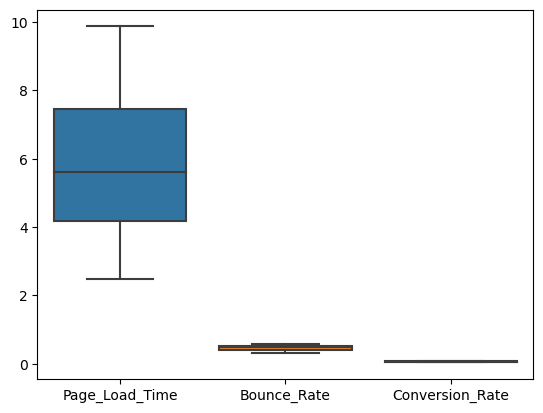

In [52]:
sns.boxplot(website_performance) #finding outlers in website_performance.csv

In [ ]:
#there is no outliers in these Datasets 
#filling the missing values 

In [37]:
# Example: Handling missing values in user_interactions.csv
user_interactions.fillna(0, inplace=True)   # Fill missing values with 0

# Example: Handling missing values in purchase_data.csv
purchase_data.dropna(inplace=True)   # Drop rows with missing values

# Example: Handling missing values in website_performance.csv
website_performance.fillna(0, inplace=True)   # Fill missing values with 0

# Purchase Analysis:

In [3]:
purchase_data = pd.read_csv("purchase_data.csv")
# Calculate total conversions (total number of unique Purchase_IDs)

total_conversions = purchase_data["Purchase_ID"].nunique()
# Calculate total visitors (total number of unique User_IDs)

total_visitors = purchase_data["User_ID"].nunique()
# Calculate overall conversion rate

conversion_rate = (total_conversions / total_visitors) * 100

In [4]:
print(f"Overall Conversion Rate: {conversion_rate:.2f}%")


Overall Conversion Rate: 70.63%


##Identify the top-selling products and product categories  


#Product Categories are not available in the in PA Test

In [5]:
# Group by Product_ID and calculate total sales for each product
product_sales = purchase_data.groupby("Product_ID")["Transaction_Amount"].sum().reset_index()

# Sort in descending order to get the top-selling products
top_selling_products = product_sales.sort_values(by="Transaction_Amount", ascending=False)


In [6]:
top_products = top_selling_products.head(10)  # top 10 products


In [7]:
top_products

,Product_ID,Transaction_Amount
10,Product_19,7125.056901
8,Product_17,6711.316153
4,Product_13,6680.243756
13,Product_3,6375.983900
12,Product_20,6359.302691
18,Product_8,5780.766674
15,Product_5,5697.714155
14,Product_4,5581.543749
17,Product_7,5369.148281
3,Product_12,5363.519340


##Relationship between interactions on the website and the likelihood of purchase.


In [8]:
# Load user interactions data
user_interactions = pd.read_csv("user_interactions.csv")

# Load purchase data
purchase_data = pd.read_csv("purchase_data.csv")

# Merge the datasets on User_ID
merged_data = pd.merge(user_interactions, purchase_data, on="User_ID", how="left")


In [9]:
# Count number of interactions per user
interactions_count = merged_data.groupby("User_ID")["Page_Viewed"].count().reset_index()
interactions_count.rename(columns={"Page_Viewed": "Total_Interactions"}, inplace=True)

# Create a binary indicator variable for purchase (1 for purchase, 0 for no purchase)
interactions_count["Purchase"] = interactions_count["User_ID"].isin(purchase_data["User_ID"]).astype(int)


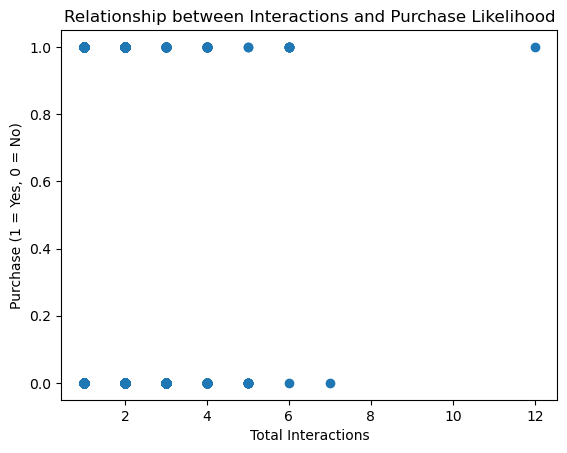

In [10]:
# Scatter plot to visualize the relationship
plt.scatter(interactions_count["Total_Interactions"], interactions_count["Purchase"])
plt.xlabel("Total Interactions")
plt.ylabel("Purchase (1 = Yes, 0 = No)")
plt.title("Relationship between Interactions and Purchase Likelihood")
plt.show()


In [11]:
correlation = interactions_count["Total_Interactions"].corr(interactions_count["Purchase"])
print("Correlation between Total Interactions and Purchase Likelihood:", correlation)


Correlation between Total Interactions and Purchase Likelihood: 0.05652289332185396


# Cohort Analysis:

# Website Performance Optimization:

        Month  Page_Load_Time  Bounce_Rate  Conversion_Rate
0  2023-01-01        5.106652     0.514345         0.047375
1  2023-02-01        7.828199     0.317157         0.062764
2  2023-03-01        3.239983     0.480903         0.050514
3  2023-04-01        5.954509     0.473572         0.057151
4  2023-05-01        9.872398     0.542407         0.089525


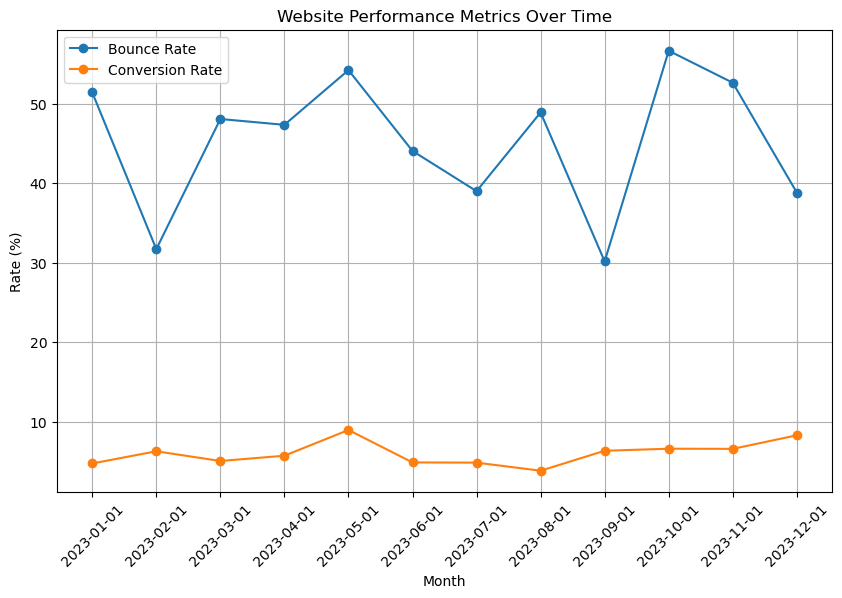

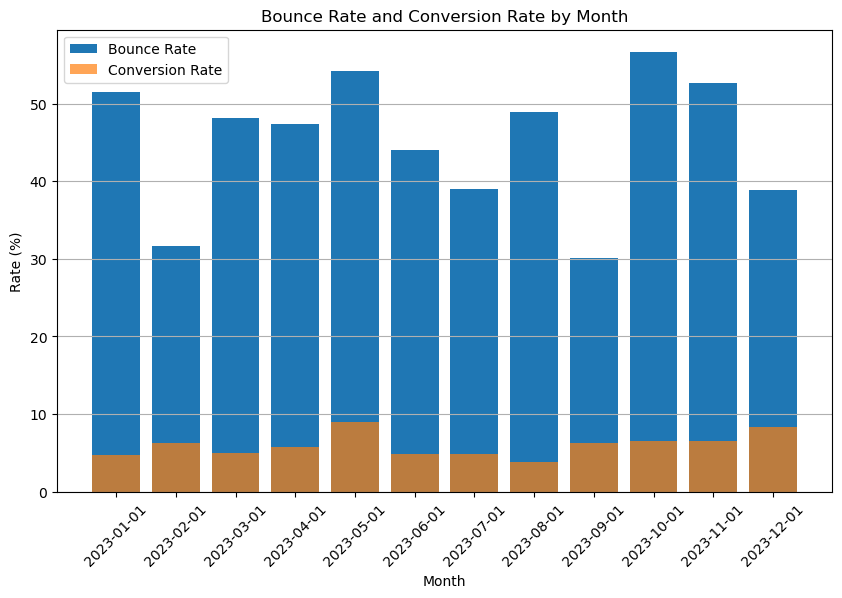

In [12]:
# Load the website performance data
website_data = pd.read_csv('website_performance.csv')

# Explore the data
print(website_data.head())

# Analyze website performance metrics
# Calculate Bounce Rate and Conversion Rate
website_data['Bounce_Rate'] = website_data['Bounce_Rate'] * 100
website_data['Conversion_Rate'] = website_data['Conversion_Rate'] * 100

# Identify areas for improvement
high_bounce_months = website_data[website_data['Bounce_Rate'] > 40]
low_conversion_months = website_data[website_data['Conversion_Rate'] < 5]

# Propose strategies
# Example: Improve page load time to reduce bounce rate
# Example : Optimize call-to-action buttons and landing page design to improve conversion rate

# visualization dashboard
# Line chart for Bounce Rate and Conversion Rate over time
plt.figure(figsize=(10, 6))
plt.plot(website_data['Month'], website_data['Bounce_Rate'], marker='o', label='Bounce Rate')
plt.plot(website_data['Month'], website_data['Conversion_Rate'], marker='o', label='Conversion Rate')
plt.xlabel('Month')
plt.ylabel('Rate (%)')
plt.title('Website Performance Metrics Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Bar chart for Bounce Rate and Conversion Rate by Month
plt.figure(figsize=(10, 6))
plt.bar(website_data['Month'], website_data['Bounce_Rate'], label='Bounce Rate')
plt.bar(website_data['Month'], website_data['Conversion_Rate'], label='Conversion Rate', alpha=0.7)
plt.xlabel('Month')
plt.ylabel('Rate (%)')
plt.title('Bounce Rate and Conversion Rate by Month')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y')
plt.show()
